<a href="https://colab.research.google.com/github/eyaguirat10/CoWin-Breast-Cancer-Detection/blob/ines/beastcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I Business Understanding**

**Summary**
The project aims to improve breast cancer diagnosis by automating the classification of tumors (benign or malignant) using machine learning algorithms on the Wisconsin Diagnostic Breast Cancer (WDBC) dataset.:

**Stakeholders**
Oncologists, radiologists, pathologists: Primary users of predictions.
Hospital IT/data teams: Responsible for integration, security, and maintenance.
Patients: Indirect beneficiaries via improved diagnostics.
**Supervised Learning**
**Business Objective (BO):** Develop a reliable, accurate system for breast cancer detection.

**Data Science Objective (DSO)**: Predict the diagnosis type — M (Malignant) or B (Benign).

Business Success Metrics These metrics require true labels to evaluate prediction performance:

**Accuracy: **Overall proportion of correct classifications. Target ≥ 98%
**Precision**: Reliability of positive (malignant) predictions. Target ≥ 97%
**F1-Score:** Balances recall and precision, especially with class imbalance. Target ≥ 97%
**AUC-ROC:** Measures ability to discriminate between classes. Target ≥ 0.99
**Unsupervised Learning**
**Business Objective (BO):** Identify and group two types of breast cancer cases.

**Data Science Objective (DSO):** Cluster and classify diagnosis patterns without predefined labels.

**Business Success Metrics Since labels are not available, success is measured differently:**

**Silhouette Score:** Measures how well-separated clusters are.
**Davies-Bouldin Index / Calinski-Harabasz Index:** Assess cluster compactness and separation.
**Domain Interpretability: **Clusters should be medically meaningful (e.g., malignant vs benign enrichment).

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

100%|██████████| 48.6k/48.6k [00:00<00:00, 49.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/breast-cancer-wisconsin-data/versions/2


**Data Understanding**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:


df = pd.read_csv(path + "/data.csv")
df.head()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
df.isnull().sum()


,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [8]:
df['diagnosis'].value_counts()


,count
diagnosis,
B,357
M,212


<Axes: xlabel='diagnosis'>

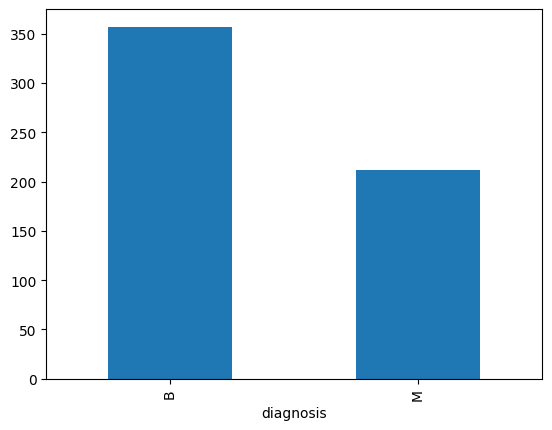

In [9]:
df['diagnosis'].value_counts().plot(kind='bar')



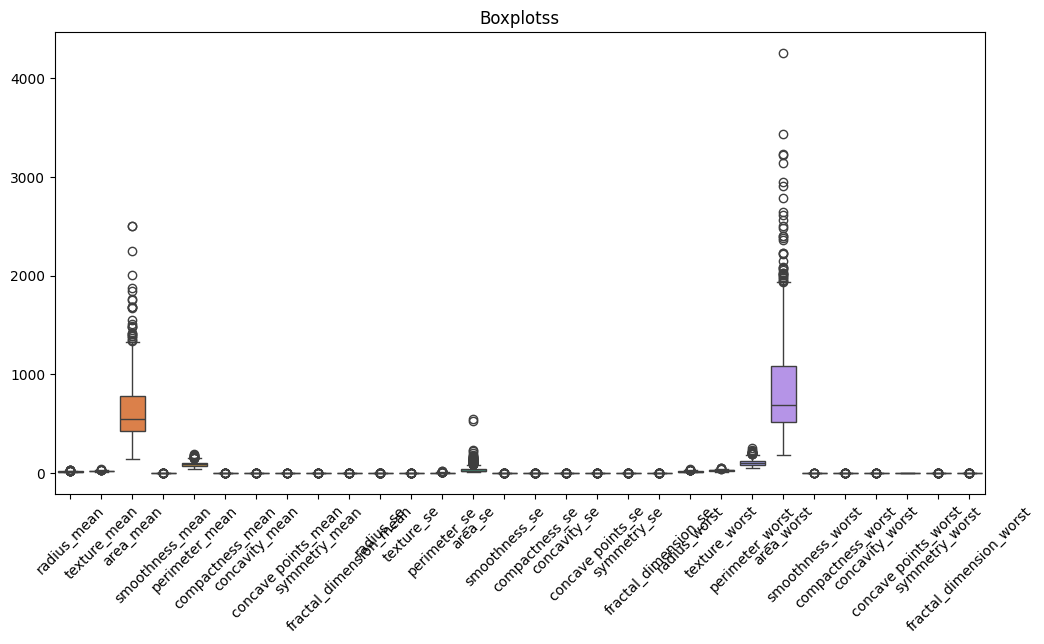

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['radius_mean', 'texture_mean', 'area_mean','smoothness_mean','perimeter_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']])
plt.title("Boxplots")
plt.xticks(rotation=45)
plt.show()


Corrélation entre les caractéristiques et le target

In [10]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
corr_target = df.corr()['diagnosis'].sort_values(ascending=False)
print("Corrélation de chaque feature avec le diagnostic :")
print(corr_target)



Corrélation de chaque feature avec le diagnostic :
diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimen

**Data preparation**

suppression des colonnes inutiles

In [15]:
df = df.drop(columns=["Unnamed: 32"])
df = df.drop(columns=["id"])

Encoder la variable cible

In [26]:
le = LabelEncoder()
df["diagnosis_encoded"] = le.fit_transform(df["diagnosis"])


Imputer les valeurs aberrantes par la mediane

In [30]:
cols_to_impute = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cols_to_impute = [col for col in cols_to_impute if col not in ['diagnosis_encoded']]

for col in cols_to_impute:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    median = df[col].median()
    df[col] = df[col].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)

# Vérification rapide
df[cols_to_impute].describe()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,13.767028,19.075589,89.726643,557.459402,0.095934,0.098003,0.077140,0.044615,0.179083,...,15.410877,25.496696,102.456960,688.346749,0.131593,0.230114,0.255058,0.114606,0.280527,0.080770
std,0.483918,2.997031,3.952084,20.890767,203.091610,0.013031,0.042622,0.061265,0.032462,0.023549,...,3.647266,5.837790,26.680427,265.622865,0.021227,0.116390,0.179775,0.065732,0.043140,0.012579
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.027290,0.000000,0.000000,0.160300,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086410,0.064920,0.029560,0.020310,0.162000,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250600,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.270000,21.590000,101.700000,646.100000,0.104900,0.125500,0.112700,0.065970,0.194300,...,17.090000,29.410000,115.900000,784.700000,0.145000,0.304600,0.366400,0.161400,0.308000,0.088320
max,1.000000,21.100000,29.430000,143.000000,1145.000000,0.132600,0.220400,0.244800,0.140100,0.241900,...,24.860000,41.850000,172.000000,1493.000000,0.187800,0.564600,0.743600,0.291000,0.399300,0.116800


Division test et train et standardiser les données

In [33]:
X = df.drop(columns=["diagnosis", "diagnosis_encoded"])
y = df["diagnosis_encoded"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Modeling**

**Evaluation**

**Deployment**